## TP4 : LES FORETS ALEATOIRES

# Méthodes d’agrégation
## A) Bagging

In [44]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt


In [2]:
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5,
max_features=0.5)

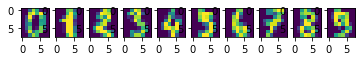

In [8]:
# charger la base de données digits

digits = load_digits()
# Affichage des 10 premières images
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

In [9]:
# classifieur de base un arbre de décision DecisionTreeClassifier
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)


1.0


In [65]:
X.shape

(1797, 64)

In [10]:
from sklearn.model_selection import train_test_split
# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.6613102595797281


# Question :
Construire la variance de la valeur accuracy sur 100 tirages pour la séparation
apprentissage/test. Que pouvons-nous conclure ?

In [35]:
list_accuracy = []
start_time = time.time()

for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy = clf.score(X_test,y_test)
    list_accuracy.append(accuracy)
end_time = time.time()
print("temps d'execution",str(end_time - start_time))

temps d'execution 0.241713285446167


In [36]:
print(f"la variance de la valeur accuracy sur 100 tirage est :{np.std(list_accuracy)}")

la variance de la valeur accuracy sur 100 tirage est :0.030361897009144597


In [21]:
clf = BaggingClassifier(tree.DecisionTreeClassifier(),
max_samples=0.5, max_features=0.5, n_estimators=200)

In [22]:
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)

In [23]:
accuracy

0.8955500618046972

# #  QUESTION

In [29]:
import time
start_time = time.time()
list_accuracy = []
for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(),
max_samples=0.5, max_features=0.5, n_estimators=200)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy = clf.score(X_test,y_test)
    list_accuracy.append(accuracy)
end_time = time.time()
print("temps d'execution",str(end_time - start_time))

temps d'execution 34.7470428943634


In [30]:
print(f"la variance de la valeur accuracy sur 100 tirage est :{np.std(list_accuracy)}")

la variance de la valeur accuracy sur 100 tirage est :0.01495369213769333


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
plt.figure()
n_estm = []
n_accuracy = []
for i in range(1,200,5):
    clf = BaggingClassifier(tree.DecisionTreeClassifier(),max_samples=0.5, max_features=0.5, n_estimators=i)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test,y_test)
    n_estm.append(i)
    n_accuracy.append(accuracy)
    
  
    

<Figure size 432x288 with 0 Axes>

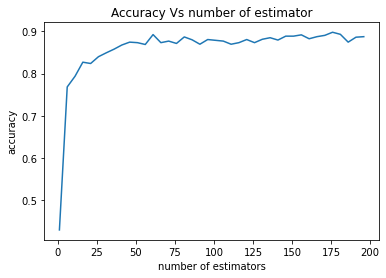

In [63]:
plt.figure()
plt.plot(n_estm,n_accuracy)
plt.xlabel('number of estimators')
plt.ylabel('accuracy')
plt.title('Accuracy Vs number of estimator')
plt.show()

# Question :

In [94]:
Dict = {"max_samples":[0.1 , 0.2 , 0.3, 0.4 ,0.5,0.6,0.7,0.8,0.9,1.0],
       "max_features": [i for i in range(0,X.shape[1],5)],
       "n_estimators":[200]}

In [95]:
Dict

{'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
 'max_features': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
 'n_estimators': [200]}

In [96]:
from sklearn.model_selection import GridSearchCV
clf = BaggingClassifier(tree.DecisionTreeClassifier())
clf_grid = GridSearchCV(clf, Dict)

In [97]:
clf_grid.fit(X_train,y_train)
clf_grid.best_params_

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 650.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 342, in _

{'max_features': 20, 'max_samples': 0.9, 'n_estimators': 200}

In [98]:
clf_grid.best_score_

0.9104761904761904

In [ ]:
clf = BaggingClassifier(tree.DecisionTreeClassifier(),max_samples=1.0, max_features=0.5, n_estimators=40)

# Forêts aléatoires

In [99]:
digits = load_digits()
X, y = digits.data, digits.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.90)

In [100]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [101]:
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.8918417799752781
